Dome Creator that creates a "Dome" above a city with heights y that minimizes amount of material used. This is an application of a divide and conquer algorithm for making basically a convex hull of the top of the buildings.

[(1, 6), (3, 12), (3, 12), (8, 15), (8, 15), (16, 15), (16, 15), (26, 8)]


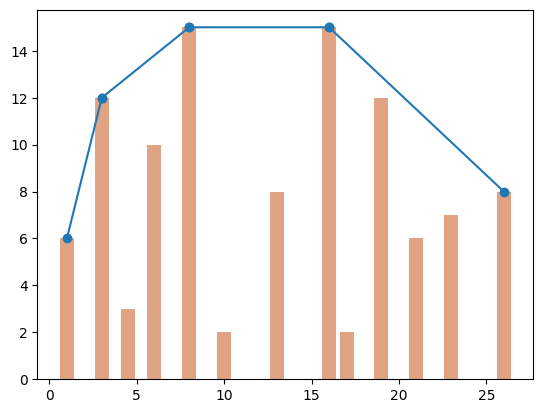

In [57]:
import matplotlib.pyplot as plt

def dome(b):
    if(len(b) <= 1):
        return b
    return domeHelper(b,0,len(b)-1)

def domeHelper(b,left,right):
  m_ = (b[right][1] - b[left][1])/(b[right][0] - b[left][0])
  b_= b[left][1] - m_*b[left][0]
  
  pointMax = -1
  for i in range(left+1,right):
    y_l = m_*b[i][0] + b_
    if y_l - b[i][1] < 0:
      if pointMax > -1:
        if b[i][1] > b[pointMax][1]:
          pointMax = i
      else:
        pointMax = i
        
  if pointMax != -1:
    leftSet = domeHelper(b,left,pointMax)
    rightSet  = domeHelper(b,pointMax, right)
    return leftSet + rightSet
  else:
    return (left,right)


set =((1,6),(3,12),(4,0),(4.5,3),(6,10),(8,15),(10,2),(13,8),(16,15),(17,2),(19,12),(21,6),(23,7),(26,8))

segments = dome(set)

s = [set[i] for i in segments] #for visualization

print(s)
plt.bar(*zip(*set), color=(0.8, 0.4, 0.2, 0.6))
plt.scatter(*zip(*s))
plt.plot(*zip(*s))
plt.show()